# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [29]:
#Basic Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data Prep
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree

# Tuning
from sklearn.model_selection import GridSearchCV

## Data Overview

- Observations
- Sanity checks

In [3]:
#Read the data
df = pd.read_csv('ExtraaLearn.csv')
df

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0


In [4]:
#General Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [5]:
#Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


In [6]:
# Checking unique values
df.nunique()

,0
ID,4612
age,46
current_occupation,3
first_interaction,2
profile_completed,3
website_visits,27
time_spent_on_website,1623
page_views_per_visit,2414
last_activity,3
print_media_type1,2


Observations:


*   The dataframe is comprised of 4612 rows with 12 columns
*   Each column has 4612 entires, indicating that there are no null values
*  ID is an identifier which is unique, with 4612 entries we can assume that each row is a unique obsevation
*  Based on the number of unique values in each column and the data description, we can easily tell which variables are continous or categorical





## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

In [ ]:
#Confirm ID has no repeats
df['ID'].nunique()

4612

In [ ]:
#Drop ID as it is an identifier and does contribute towards analysis
df.drop(['ID'], axis = 1, inplace = True)
df

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0


Univaraite Analysis:

<Axes: xlabel='age'>

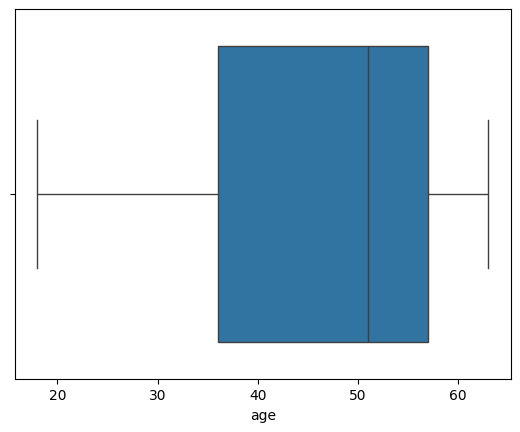

In [ ]:
#Age
sns.boxplot(data = df, x = 'age')

Observation: The age ranges from 18-63 with a median of 51. It is right skewed meaning most of leads are older

<Axes: xlabel='website_visits', ylabel='Count'>

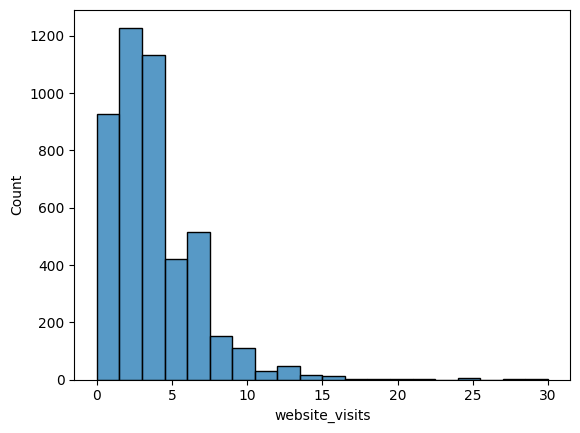

In [ ]:
#Website Visits
sns.histplot(data = df, x = 'website_visits', bins = 20)

Observation: We can see that most people vist the website less than 10 times, meaning that most leads will not revist after their 10th visit

Text(0.5, 0, 'Time spent on website in seconds')

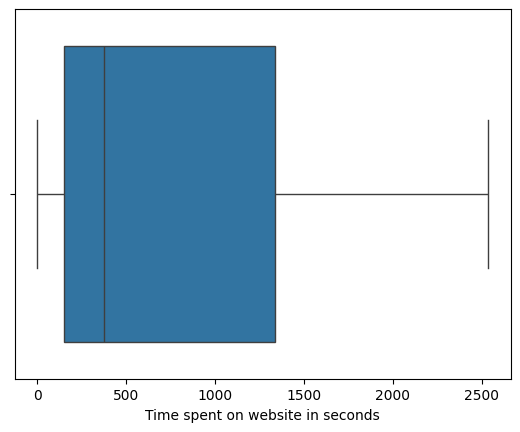

In [ ]:
#Time spent on website
sns.boxplot(data = df, x = 'time_spent_on_website')
plt.xlabel("Time spent on website in seconds")

Observation: We can see that data is left skewed, meaning that most leads spend less than 8 minutes on the website.


<Axes: xlabel='page_views_per_visit', ylabel='Count'>

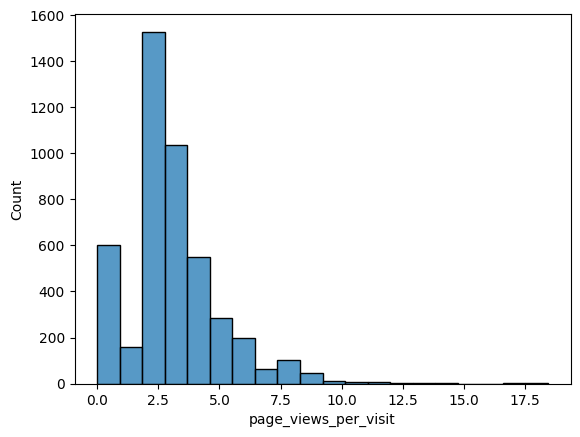

In [ ]:
#Page views per visit
sns.histplot(data = df, x = 'page_views_per_visit', bins = 20)

Observation: Most leads view less than 5 pages, meaning the website should do its best to maximize engagement within those 5 pages

<Axes: xlabel='current_occupation', ylabel='count'>

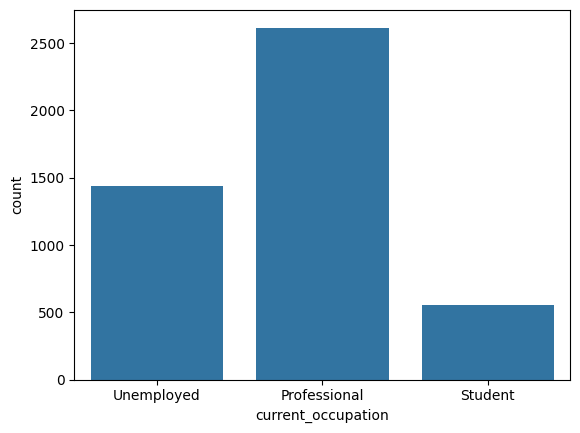

In [ ]:
#Current occupation
sns.countplot(data = df, x = 'current_occupation')

Observaiton: Most of the leads are currently in a professional occupation, with the least amount of leads being students. ExtraaLearn should cater more towards people with jobs or seeking jobs

<Axes: xlabel='first_interaction', ylabel='count'>

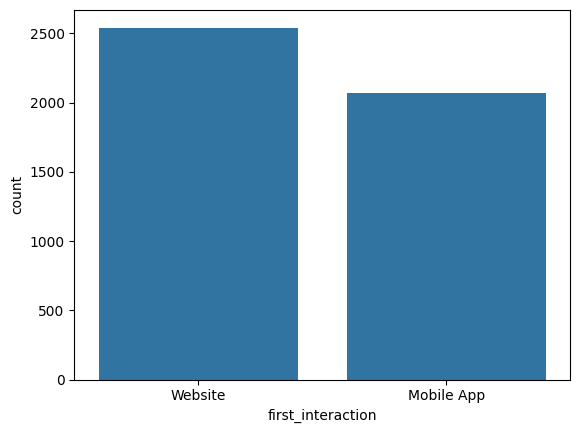

In [ ]:
#first interaction
sns.countplot(data = df, x = 'first_interaction')

Observation: Most leads seem to visit the website first, although the mobile app is still very popular. ExtraaLearn should support both platforms as they both add value

<Axes: xlabel='profile_completed', ylabel='count'>

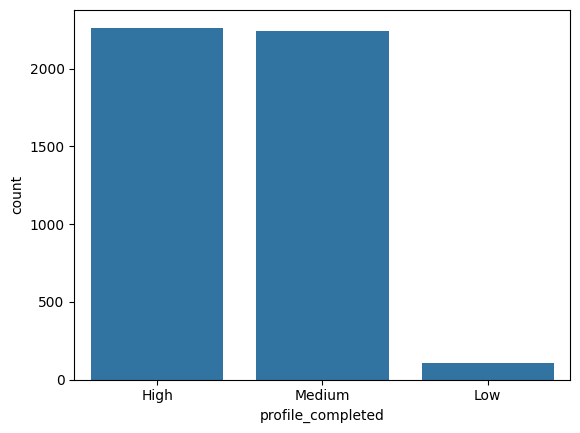

In [ ]:
#Profile Completion
sns.countplot(data = df, x = 'profile_completed')

Observation: Most leads tend to complete their profile, this means that ExtraaLearn has good engagement

<Axes: xlabel='last_activity', ylabel='count'>

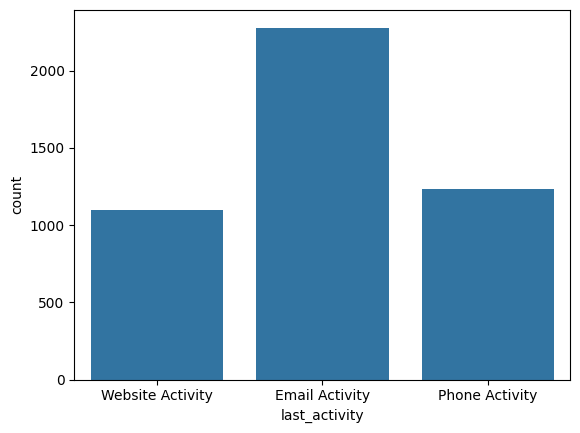

In [ ]:
#Last activity
sns.countplot(data = df, x = 'last_activity')

Observation: Most leads have their last activity through email. This means that ExtraaLearn should support their email acvitity more to support the customers. Although both website and phone activity are popular, and should still be supported


Text(0.5, 0, 'Newspaper')

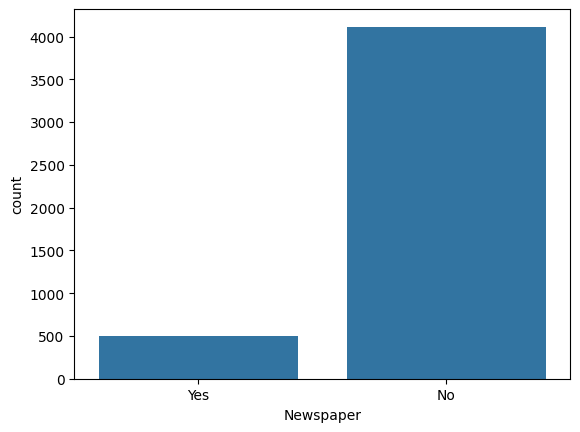

In [ ]:
#Print media
sns.countplot(data = df, x = 'print_media_type1')
plt.xlabel('Newspaper')

Observation: Most leads don't see ExtraaLearn through the newspaper. ExtraaLearn should either discontinue their ads through the newspaper of find a new strategy to be more visible

Text(0.5, 0, 'Magazine')

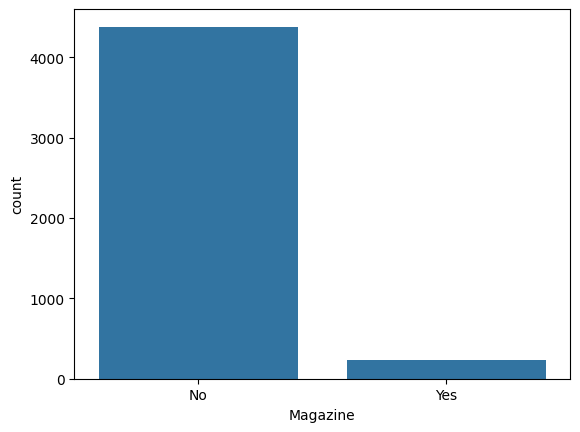

In [ ]:
sns.countplot(data = df, x = 'print_media_type2')
plt.xlabel('Magazine')

Observation: Similar to Newspaper, most ads through the magazine are not viewed. ExtraaLearn should discontinue their print media

<Axes: xlabel='digital_media', ylabel='count'>

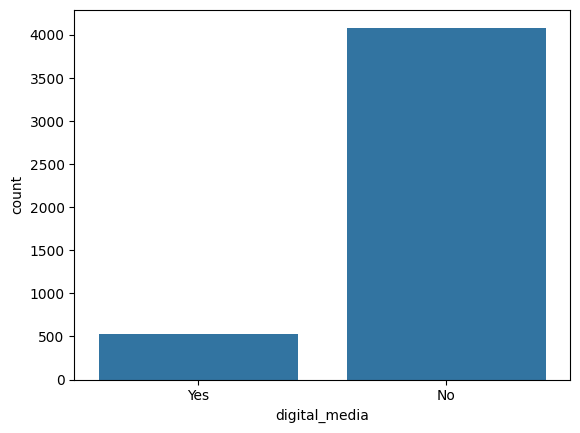

In [ ]:
#Digital media
sns.countplot(data = df, x = 'digital_media')

Observation: It seems that digital media is also not as effective. ExtraaLearn should aim to better utilize digital platforms

<Axes: xlabel='educational_channels', ylabel='count'>

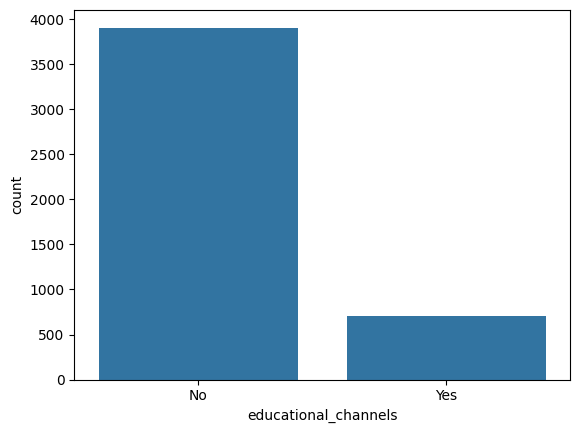

In [ ]:
#Educational channels
sns.countplot(data = df, x = 'educational_channels')

Observation: Educational channels aren't popular as well with most leads not finding them through this way

<Axes: xlabel='referral', ylabel='count'>

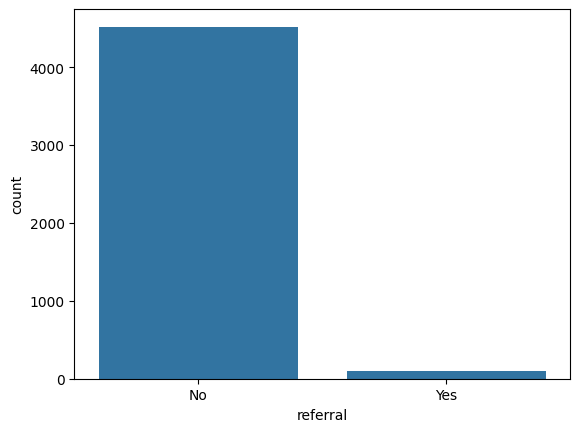

In [ ]:
#Referrals
sns.countplot(data = df, x = 'referral')

Observation: It seems that word of mouth / referral is also not an effective strategy. ExtraaLearn can try to improve this by leaving incentives for referring a new customer

<Axes: xlabel='status', ylabel='count'>

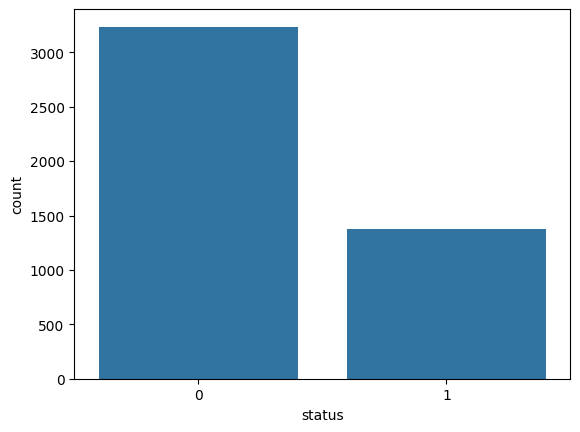

In [ ]:
#Status
sns.countplot(data = df, x = 'status')

Observation: Most leads have not been converted to a paid customer. This means that despite capturing a leads interest, they were not able to fully transfer that into a profit

Questions and Bivariate analysis:

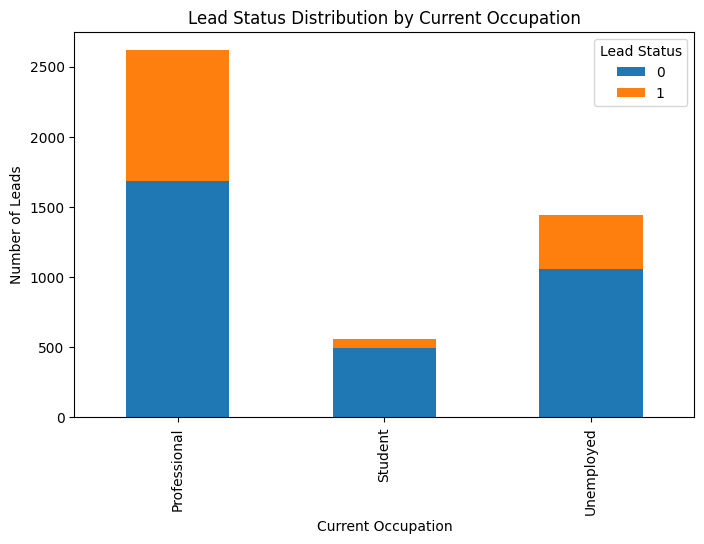

In [ ]:
#Question 1, Occupation vs Lead

#Create df of occupation vs lead
occupation_lead_status_df = df.groupby(['current_occupation', 'status']).size().unstack(fill_value=0)

#Plot via stacked bar plot
occupation_lead_status_df.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Lead Status Distribution by Current Occupation')
plt.xlabel('Current Occupation')
plt.ylabel('Number of Leads')
plt.legend(title='Lead Status')
plt.show()

Observations: We can see that people with a professional occupation tend to have the best conversion rate, with unemployed being the second highest and students being the worst.

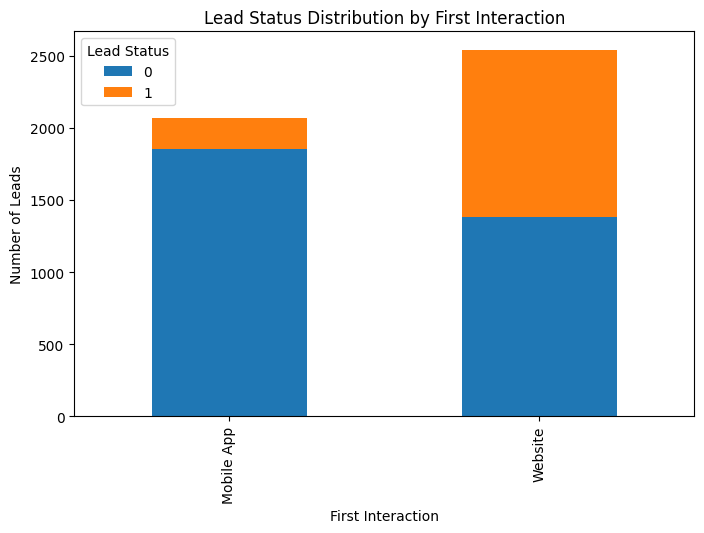

In [ ]:
#Question 2, first interactions vs Lead

#Create df of first interactions vs lead
first_interaction_lead_status_df = df.groupby(['first_interaction', 'status']).size().unstack(fill_value=0)

#Plot via stacked bar plot
first_interaction_lead_status_df.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Lead Status Distribution by First Interaction')
plt.xlabel('First Interaction')
plt.ylabel('Number of Leads')
plt.legend(title='Lead Status')
plt.show()


Observation: We can see that first interactions done through website have a better conversion rate than through the mobile app

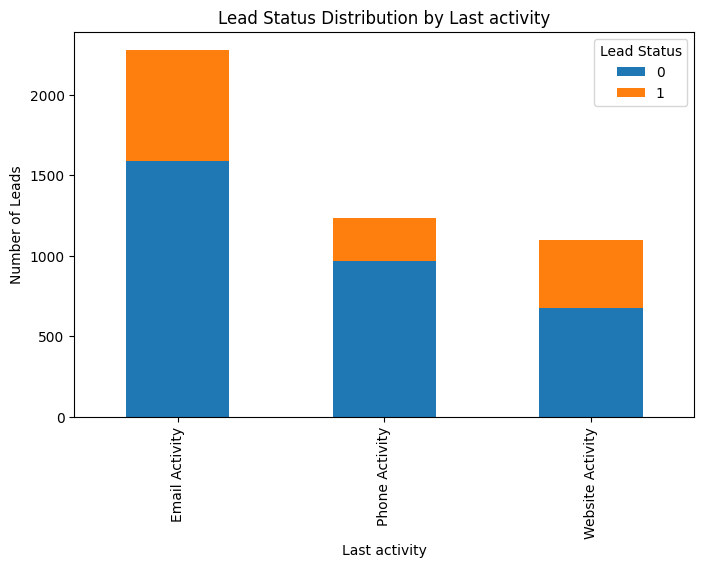

In [ ]:
#Question 3, Last activity vs lead

#Create df of Last activitys vs lead
Last_activity_lead_status_df = df.groupby(['last_activity', 'status']).size().unstack(fill_value=0)

#Plot via stacked bar plot
Last_activity_lead_status_df.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Lead Status Distribution by Last activity')
plt.xlabel('Last activity')
plt.ylabel('Number of Leads')
plt.legend(title='Lead Status')
plt.show()

Observation: We see that webiste activity has the biggest conversion rate by %, but is the least popular. Because of that, email activity would be the best method of interaction as is has the highest amount of leads with the second best conversion rate

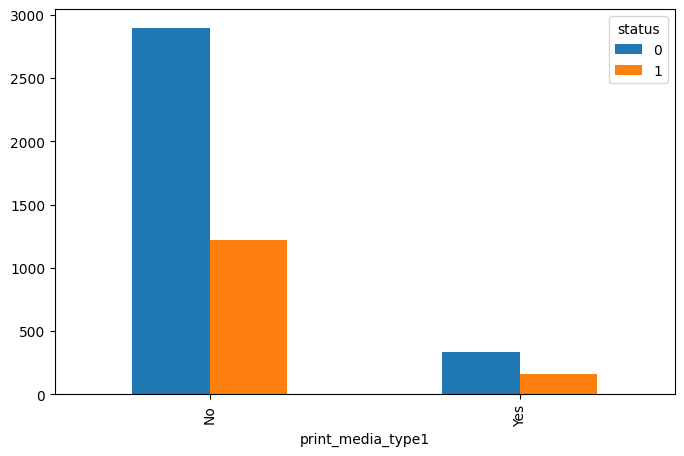

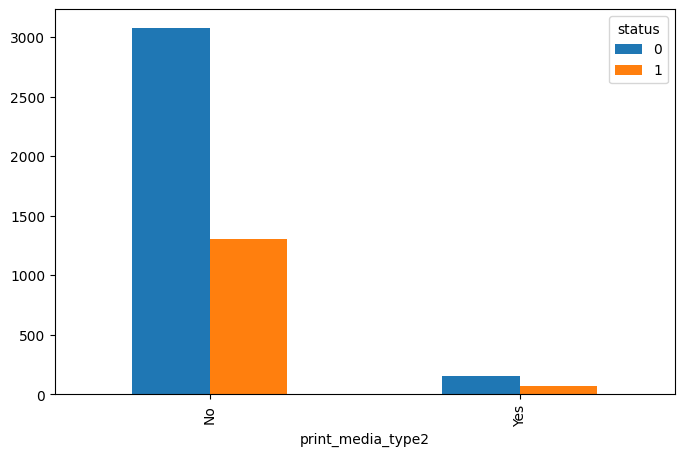

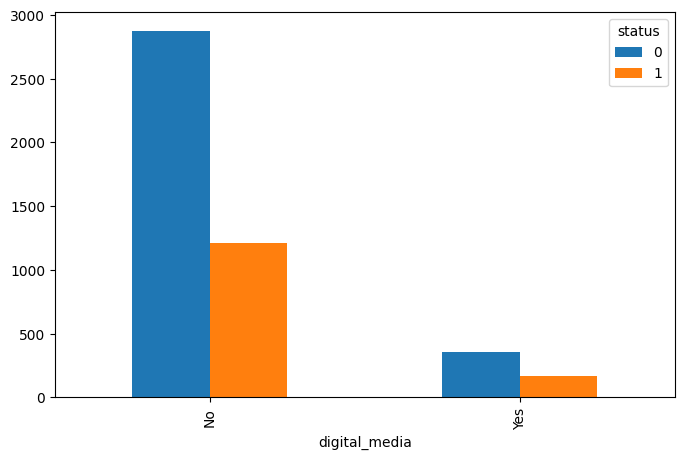

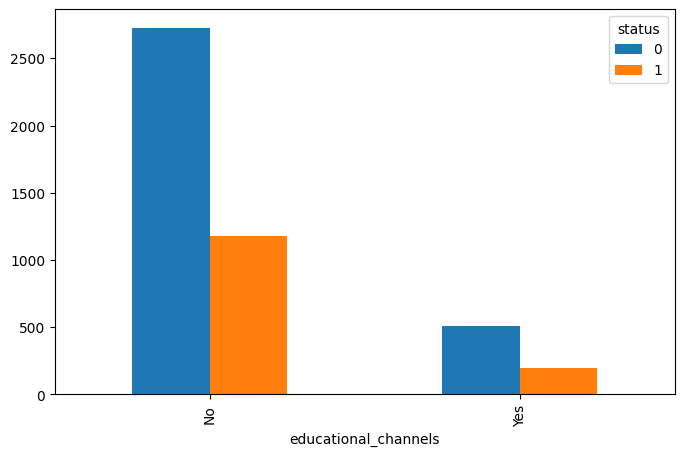

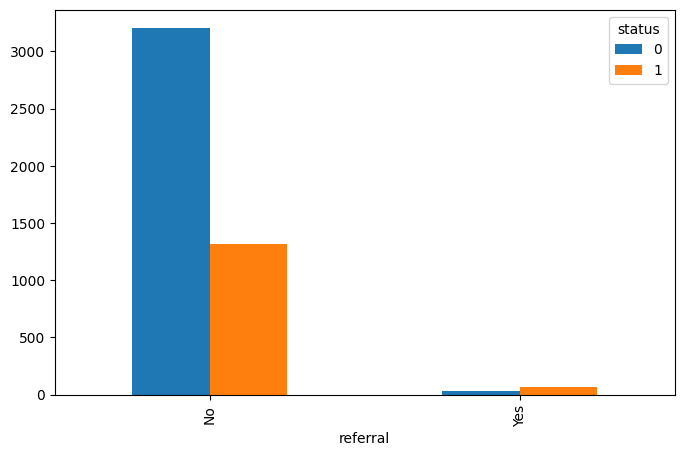

In [ ]:
#Question 4, Media vs Lead

#Create df of media type vs status
Media_type_df = df[['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']]

#Plot via Bar graph
for i in Media_type_df:
  status_df = df.groupby([i, 'status']).size().unstack(fill_value=0)
  status_df.plot(kind='bar', stacked=False, figsize=(8, 5))


Observation: We see that print media, type one and two, both seem to have a high conversion rate as well as having a high number of leads. Digital media and referrals also share this aspect.

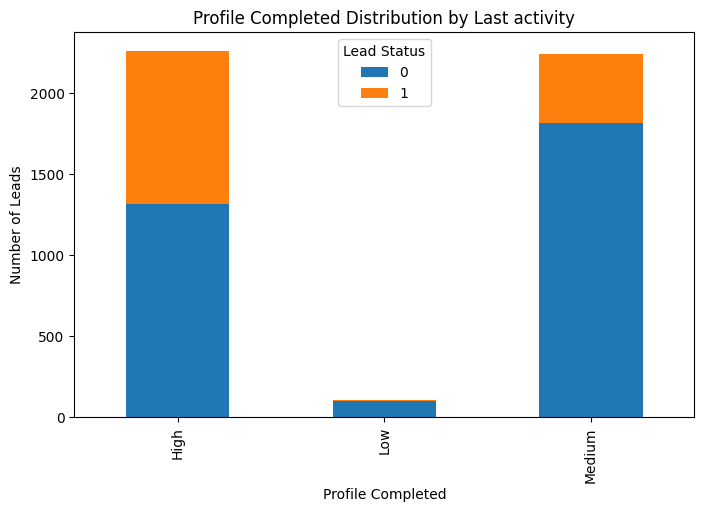

In [ ]:
#Question 5, profile completed vs lead

#Create df of profile completed cs lead
profile_completed_df = df.groupby(['profile_completed', 'status']).size().unstack(fill_value=0)

#Plot via stack bar graph
profile_completed_df.plot(kind = 'bar', stacked = True, figsize=(8,5))
plt.title('Profile Completed Distribution by Last activity')
plt.xlabel('Profile Completed')
plt.ylabel('Number of Leads')
plt.legend(title='Lead Status')
plt.show()

Observation: We can see that having more details about a prospect does indeed lead to a higher conversion rate, with having more informaiton directly correlate to more conversions

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
#Missing Value treatment
df.isna().sum()

,0
age,0
current_occupation,0
first_interaction,0
profile_completed,0
website_visits,0
time_spent_on_website,0
page_views_per_visit,0
last_activity,0
print_media_type1,0
print_media_type2,0


Observation: Missing value treatment not needed

In [7]:
#Feature Engineering
X = df.drop('status', axis = 1)
Y = df['status']
#Get dummies (Categorical)
X = pd.get_dummies(X, drop_first=True)

Observation: We want to predict status, so we will drop the dependent variable from X and place it into Y

In [8]:
#Split the data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.20, random_state = 1)

Observation: We will split training and testing data into the standard 80-20 split

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
print(X.shape)
print(Y.shape)

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(4612, 16)
(4612,)
(3689, 16) (3689,)
(923, 16) (923,)


Observation: We can see that X has 16 columns, which will be our parameters while Y is our one column/ dependent varaiable we are trying to predict. We can can also see that we have succesfully split the training and testing data into the 80-20 ratio

## Building a Decision Tree model

In [24]:
#Establish Metrics to evaluate model
def metrics_evaluate(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [9]:
#Fit the data
DTree = DecisionTreeClassifier()
DTree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [10]:
#Performance Testing
y_prediction_train1 = DTree.predict(X_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2600
           1       1.00      1.00      1.00      1089

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689



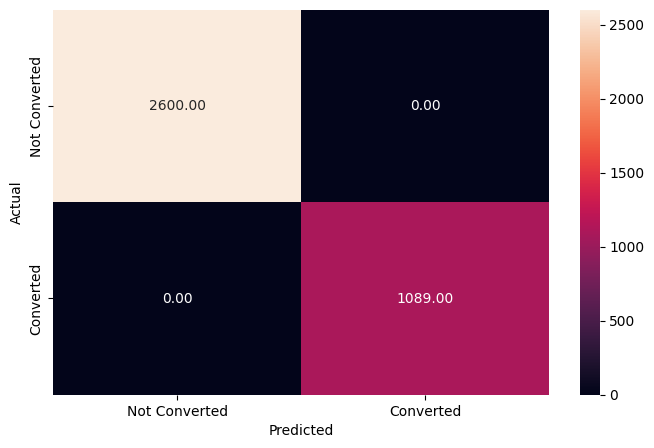

In [25]:
#Evaluate Performance
metrics_evaluate(Y_train, y_prediction_train1)

Observations:


*    A precision of 1.00 for both classes (0 and 1) indicates that the model has no false positives
*    A recall of 1.00 for both classes indicates that the model correctly identifies all actual positives
*   An F1-score of 1.00 for both classes shows a perfect balance between precision and recall for each class
*   An accuracy of 1.00 indicates that the model correctly classified all samples in the dataset.



In [14]:
#Performance Testing on test data
DTree.fit(X_test, Y_test)
y_prediction_test1 = DTree.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       635
           1       1.00      1.00      1.00       288

    accuracy                           1.00       923
   macro avg       1.00      1.00      1.00       923
weighted avg       1.00      1.00      1.00       923



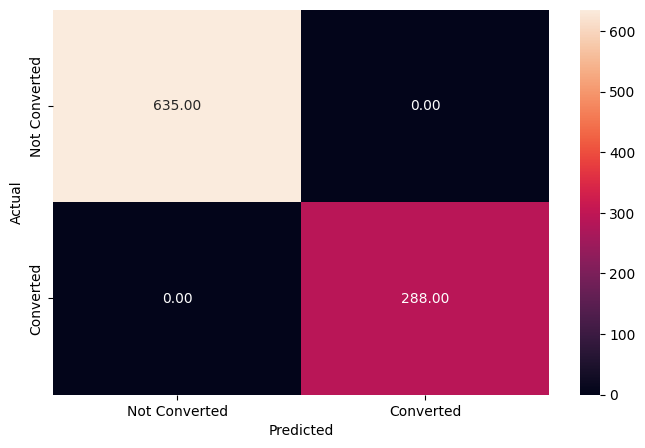

In [31]:
#Evaluate Performance of test data
metrics_evaluate(Y_test,y_prediction_test1)

Observation: The Decision tree holds up for the test data with the same results in precision, recall and F1 score. This means that our models works well

## Do we need to prune the tree?

Observation: The model seems to perform well getting a 1 in precision, recall and F1 score for both the test and training data. This means that our model does not overfit the training data and can be used for future datasets. Pruning is not neccesary here. However, we can optimize the model performance by performing GridSearchCV

In [33]:
#GridSearchCV

#Parameters
parameters = {'max_depth': np.arange(2, 10),'criterion': ['gini', 'entropy'],'min_samples_leaf': [5, 10, 20, 25]}

#Weight assignment wwith not converted given a weight of 0.4 and converted is given a weight of 0.6
DTree_tuning = DecisionTreeClassifier(random_state=7, class_weight={0: 0.3, 1: 0.7})

#Scoring, using recall score because cost of false negatives are high
Score_method = metrics.make_scorer(recall_score, pos_label=1)

#Perform GridSearch
gridsearch = GridSearchCV(DTree_tuning, parameters, scoring=Score_method, cv=5)
gridsearch = gridsearch.fit(X_train, Y_train)

#Select best combination
DTree_tuning = gridsearch.best_estimator_

#Fit the algorithm
DTree_tuning.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

              precision    recall  f1-score   support

           0       0.95      0.74      0.83      2600
           1       0.59      0.91      0.72      1089

    accuracy                           0.79      3689
   macro avg       0.77      0.82      0.77      3689
weighted avg       0.84      0.79      0.80      3689



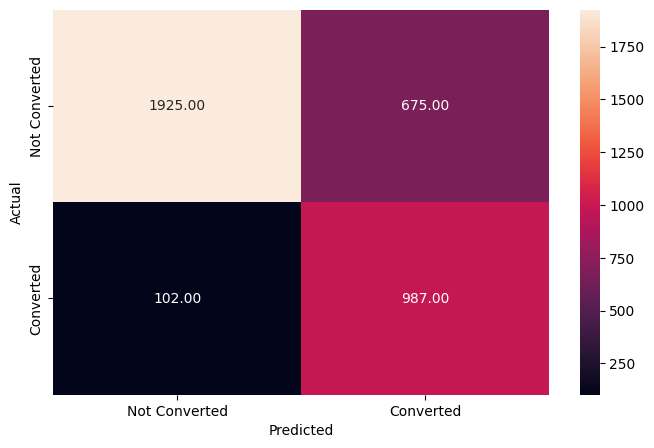

In [34]:
#Evaluate Performance
y_prediction_train2 = DTree_tuning.predict(X_train)
metrics_evaluate(Y_train,y_prediction_train2)

Observation: It seems that gridsearch did not improve our model as we get wrose precision, recall and F1 scores. This means that the gridsearch is a bit too complex and can lead to overfitting. We can try on the test data as well

              precision    recall  f1-score   support

           0       0.93      0.75      0.83       635
           1       0.61      0.88      0.72       288

    accuracy                           0.79       923
   macro avg       0.77      0.81      0.78       923
weighted avg       0.83      0.79      0.80       923



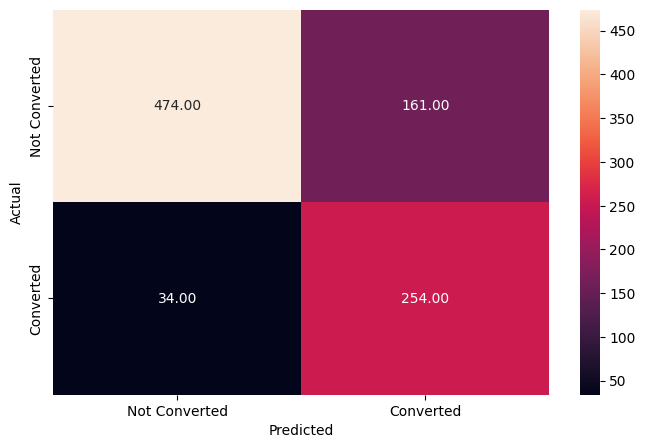

In [41]:
gridsearch = gridsearch.fit(X_test, Y_test)
DTree_tuning.fit(X_test, Y_test)
y_prediction_test2 = DTree_tuning.predict(X_test)
metrics_evaluate(Y_test, y_prediction_test2)

Observation: Similar results here, gridsearch is not optimal for this decision tree model

## Building a Random Forest model

In [16]:
#Fit the data
RF = RandomForestClassifier()
RF.fit(X_train, Y_train)

RandomForestClassifier()

In [17]:
#Performance Testing
y_rfprediction_train1 = RF.predict(X_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2600
           1       1.00      1.00      1.00      1089

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689



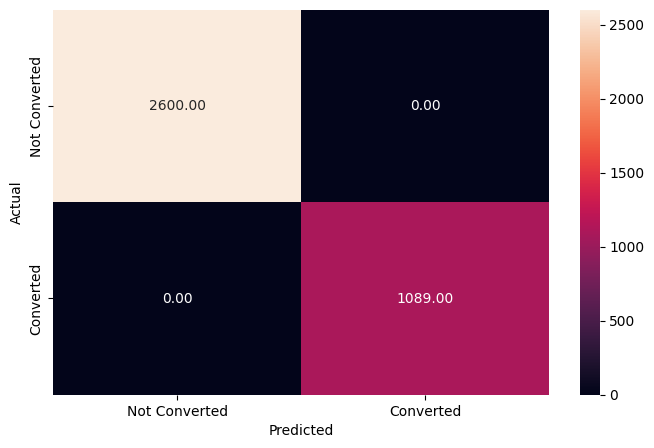

In [26]:
#Evaluate Performance
metrics_evaluate(Y_train, y_rfprediction_train1)

Observation: Just like the Decision tree, the random forest model does very well on the training data, with perfect scores on precision, recall and F1

In [19]:
#Test on test dataset
RF.fit(X_test, Y_test)
y_rfprediction_test1 = RF.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       635
           1       1.00      1.00      1.00       288

    accuracy                           1.00       923
   macro avg       1.00      1.00      1.00       923
weighted avg       1.00      1.00      1.00       923



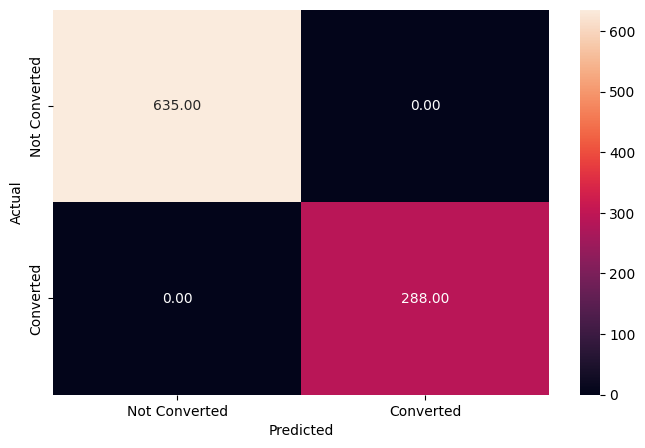

In [20]:
#Evaluate performance on test data
metrics(Y_test, y_rfprediction_test1)

Observation: Just as the training dataset, our random forest model holds up extremely well with perfect scores in precision, recall and F1 score

## Do we need to prune the tree?

Observation: The RF model performs well getting a 1 in precision, recall and F1 score for both the test and training data. This means that our model does not overfit the training data and can be used for future datasets. Pruning is not neccesary here either, but we can aim to optimize with gridsearch

In [37]:
#GridSearchCV for RF

#Parameters
parametersRF = {"n_estimators": [110, 120], "max_depth": [6, 7], "min_samples_leaf": [20, 25], "max_features": [0.8, 0.9],
              "max_samples": [0.9, 1],"class_weight": ["balanced",{0: 0.3, 1: 0.7}]}

#Classifier and Criterion
RF_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

#Scoring method, same reasoning as before
Score_methodRF = metrics.make_scorer(recall_score, pos_label = 1)

#Preform Gridsearch
gridsearchRF = GridSearchCV(estimator= RF_tuned , param_grid=parametersRF, scoring= Score_methodRF, cv=5)
gridsearchRF = gridsearchRF.fit(X_train, Y_train)

#Take best one
RF_tuned = gridsearchRF.best_estimator_

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      2600
           1       0.68      0.87      0.76      1089

    accuracy                           0.84      3689
   macro avg       0.81      0.85      0.82      3689
weighted avg       0.86      0.84      0.84      3689



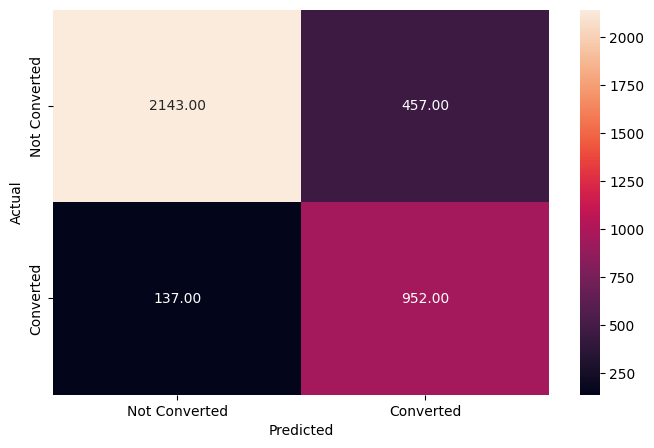

In [39]:
#Evaluate Performance
RF_tuned.fit(X_train, Y_train)
y_rfprediction_train2 = RF_tuned.predict(X_train)
metrics_evaluate(Y_train, y_rfprediction_train2)

Observation: Similar to when we did gridsearch on the decision tree models, it seems that gridsearch is a bit too complicated for this dataset and performs worse than the original model

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       635
           1       0.68      0.87      0.76       288

    accuracy                           0.83       923
   macro avg       0.80      0.84      0.81       923
weighted avg       0.85      0.83      0.83       923



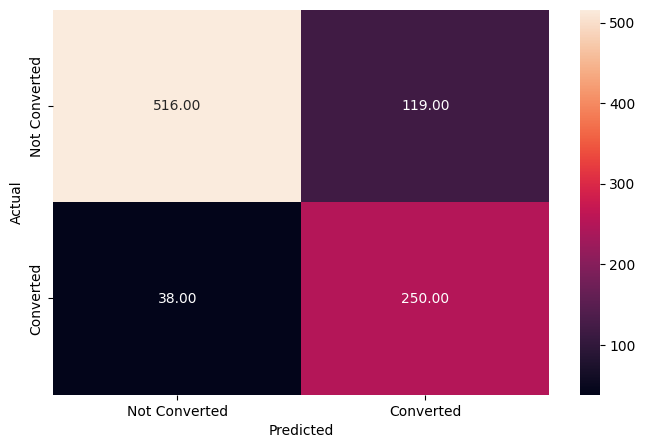

In [40]:
#Test on test data
RF_tuned.fit(X_test, Y_test)
y_rfprediction_test2 = RF_tuned.predict(X_test)
metrics_evaluate(Y_test, y_rfprediction_test2)

Observation: Just as the training data, the test data performs worse

## Actionable Insights and Recommendations

Insights:
*   The analysis shows that time spent on the website and the number of page views are significant indicators of lead interest. ExtraaLearn should continue to collect and even enhance this behavioral data, potentially tracking finer details like click paths, time spent on specific pages, and interaction with specific types of content
*   Since the analysis shows that occupation is a significant predictor of lead conversion, ExtraaLearn should consider developing targeted marketing campaigns for professional occupational groups. Tailor messaging and content to resonate more with the specific needs and pain points of professionals


Reccomendations:

*   Create a composite engagement score by combining these metrics (e.g., time spent, interactions) to better identify high-potential leads early.
*   Since profile completion seems to correlate with higher conversion rates, ExtraaLearn should implement strategies to encourage leads to complete their profiles. This could include sending reminders, providing incentives, or simplifying the profile completion process.
*    The analysis of media types indicates varying effectiveness. ExtraaLearn should evaluate the ROI of different media channels (print, digital, referrals) and reallocate budget and resources to the most effective channels






